# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [20]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

    # Step 2:
        response = requests.get(city_url)
        
        # Step 3: 
        status_code = response.status_code
        
        # Step 4: 
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {} # failed request

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_lng = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt")
        city_pressure = city_weather.get("main", {}).get("pressure") # lol booth extra bonus line

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Pressure": city_pressure,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass

    # sleep for 1 second
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tranovaho
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | st. john's
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | haiku-pauwela
Processing Record 7 of Set 1 | silvia
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | kismayo
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | okhotsk
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | pale
Processing Record 15 of Set 1 | colonia
Processing Record 16 of Set 1 | riyadh
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | wailua homesteads
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | orlov
Processing Record 22 of Set 1 | luderitz
Processing Record 23 of Set

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           571
Lng           571
Max Temp      571
Humidity      571
Pressure      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [23]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
0,tranovaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
1,bethel,41.3712,-73.4140,80.96,79.0,1019.0,38.0,1.99,US,1.720915e+09
2,st. john's,47.5649,-52.7093,72.79,84.0,1012.0,75.0,17.27,CA,1.720915e+09
3,avarua,-21.2078,-159.7750,78.85,78.0,1014.0,75.0,11.50,CK,1.720915e+09
4,albany,42.6001,-73.9662,81.43,69.0,1019.0,57.0,1.99,US,1.720915e+09


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_booth.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_booth.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,tranovaho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bethel,41.3712,-73.4140,80.96,79.0,1019.0,38.0,1.99,US,1.720915e+09
2,st. john's,47.5649,-52.7093,72.79,84.0,1012.0,75.0,17.27,CA,1.720915e+09
3,avarua,-21.2078,-159.7750,78.85,78.0,1014.0,75.0,11.50,CK,1.720915e+09
4,albany,42.6001,-73.9662,81.43,69.0,1019.0,57.0,1.99,US,1.720915e+09


In [26]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593 entries, 0 to 592
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        593 non-null    object 
 1   Lat         571 non-null    float64
 2   Lng         571 non-null    float64
 3   Max Temp    571 non-null    float64
 4   Humidity    571 non-null    float64
 5   Pressure    571 non-null    float64
 6   Cloudiness  571 non-null    float64
 7   Wind Speed  571 non-null    float64
 8   Country     568 non-null    object 
 9   Date        571 non-null    float64
dtypes: float64(8), object(2)
memory usage: 51.0+ KB


In [29]:
city_data_df.loc[pd.isnull(df.Lat)]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [28]:
# drop na because I was so good at writing robust, not failing code
df = city_data_df.dropna(how="any").reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City_ID     568 non-null    int64  
 1   City        568 non-null    object 
 2   Lat         568 non-null    float64
 3   Lng         568 non-null    float64
 4   Max Temp    568 non-null    float64
 5   Humidity    568 non-null    float64
 6   Pressure    568 non-null    float64
 7   Cloudiness  568 non-null    float64
 8   Wind Speed  568 non-null    float64
 9   Country     568 non-null    object 
 10  Date        568 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 48.9+ KB


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

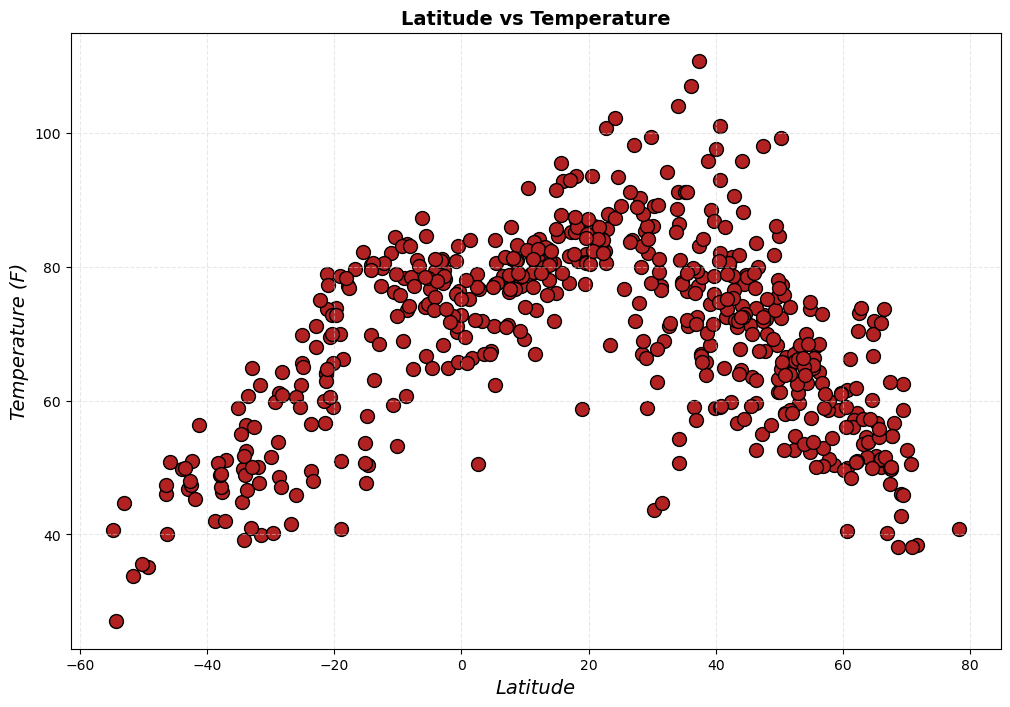

In [34]:
# Build scatter plot for latitude vs. temperature
x = df.Lat
y = df['Max Temp']

# Incorporate the other graph properties
plt.figure(figsize=(12, 8))
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)
plt.xlabel("Latitude", fontsize=14, fontstyle="italic")
plt.ylabel("Temperature (F)", fontsize=14, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=14)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

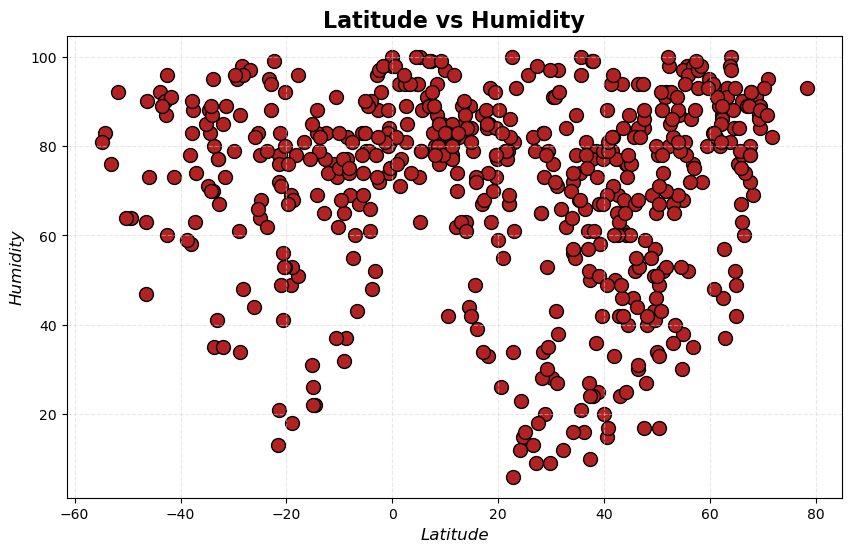

In [35]:
# Build the scatter plots for latitude vs. humidity
x = df.Lat
y = df.Humidity

# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)
plt.xlabel("Latitude", fontsize=12, fontstyle="italic")
plt.ylabel("Humidity", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

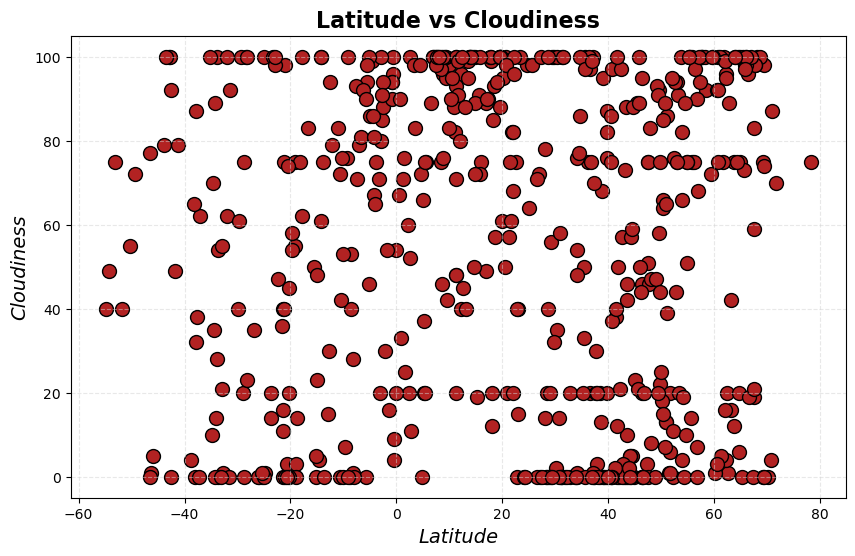

In [36]:
# Build the scatter plots for latitude vs. cloudiness
x = df.Lat
y = df.Cloudiness

# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)
plt.xlabel("Latitude", fontsize=14, fontstyle="italic")
plt.ylabel("Cloudiness", fontsize=14, fontstyle="italic")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [62]:
# Build the scatter plots for latitude vs. wind speed
x = df.Lat
y = df.Windspeed

# Incorporate the other graph properties
plt.figure(figsize=(10, 6))
plt.scatter(x, y, facecolor="firebrick", edgecolor="black", s=100)
plt.xlabel("Latitude", fontsize=14, fontstyle="italic")
plt.ylabel("Windspeed", fontsize=14, fontstyle="italic")
plt.title("Latitude vs Windspeed", fontweight="bold", fontsize=16)

plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Windspeed'

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
1,bethel,41.3712,-73.4140,80.96,79.0,1019.0,38.0,1.99,US,1.720915e+09
2,st. john's,47.5649,-52.7093,72.79,84.0,1012.0,75.0,17.27,CA,1.720915e+09
4,albany,42.6001,-73.9662,81.43,69.0,1019.0,57.0,1.99,US,1.720915e+09
5,haiku-pauwela,20.9219,-156.3051,86.02,55.0,1018.0,20.0,26.46,US,1.720915e+09
6,silvia,2.6110,-76.3785,50.49,89.0,1019.0,52.0,7.65,CO,1.720915e+09


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Pressure,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
3,avarua,-21.2078,-159.7750,78.85,78.0,1014.0,75.0,11.50,CK,1.720915e+09
7,port-aux-francais,-49.3500,70.2167,35.15,64.0,1015.0,72.0,28.07,TF,1.720915e+09
8,adamstown,-25.0660,-130.1015,65.57,64.0,1016.0,100.0,3.98,PN,1.720915e+09
9,kismayo,-0.3582,42.5454,76.42,81.0,1015.0,9.0,16.04,SO,1.720915e+09
12,waitangi,-43.9535,-176.5597,49.82,92.0,1033.0,79.0,3.00,NZ,1.720915e+09


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.5983775161539185


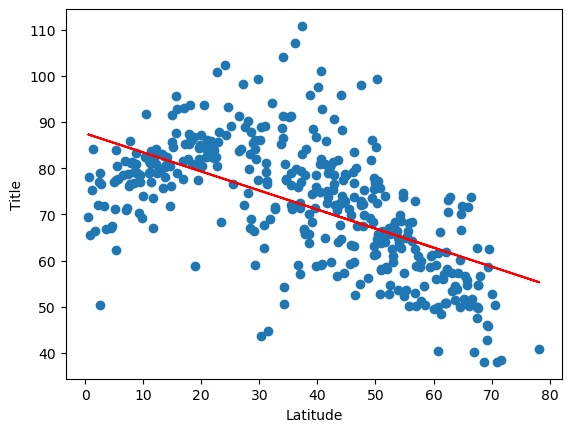

In [55]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.804239690851422


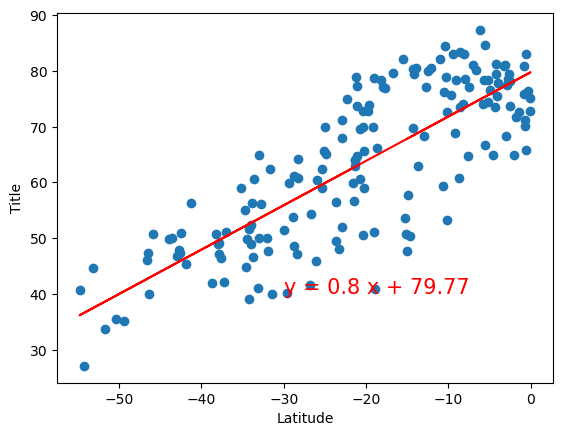

In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.01914814296022476


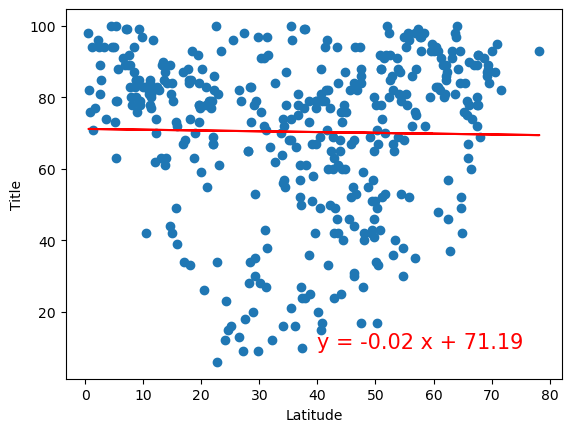

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.027675360236114572


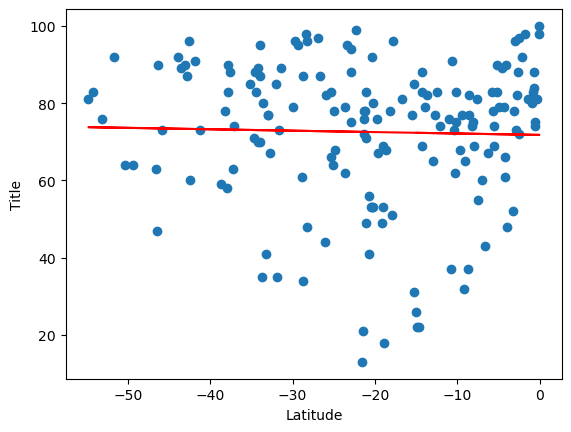

In [58]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.1444044098785691


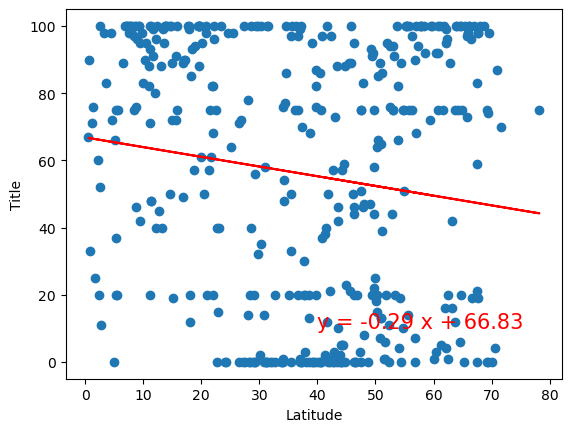

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.14126788211076993


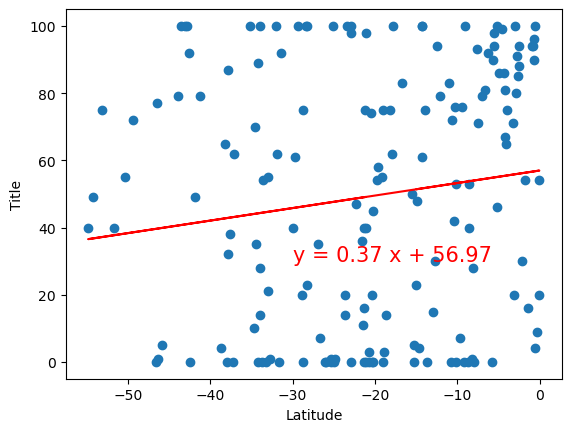

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [61]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

KeyError: 'Windspeed'

In [63]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Windspeed"]
plot_linear_regression(x_values,y_values, 'Windspeed', (-30,30))

KeyError: 'Windspeed'

**Discussion about the linear relationship:** YOUR RESPONSE HERE